## Proces eksploracji danych: Korelacje i transformacja danych

Wciąż znajdujemy się na etapie zrozumienia i przygotowania danych. Wciąż przyglądamy się przykładowemu zbiorowi danych z Bostonu, który już znamy:

In [186]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import numpy as np
from scipy.stats import skew, kurtosis

housing = datasets.load_boston()
dane = pd.DataFrame(housing['data'], columns = housing['feature_names'])
cena = pd.DataFrame(housing['target'], columns = ["cena"])

5.003868077110009
4.994731314754979
0.9983295009780568
1.3533097475899671


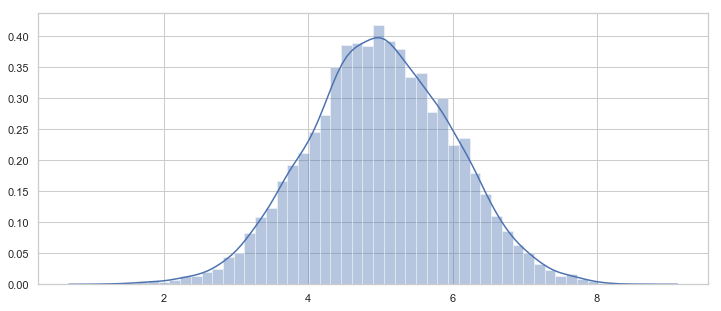

In [187]:
x = np.random.normal(5,1,10000)
plt.figure(figsize=(12,5))
sns.distplot(x)
print(np.mean(x))
print(np.median(x))
print(np.std(x))
print(np.quantile(x,q=.75)-np.quantile(x,q=.25))

In [188]:
przest = dane["CRIM"]
przest.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

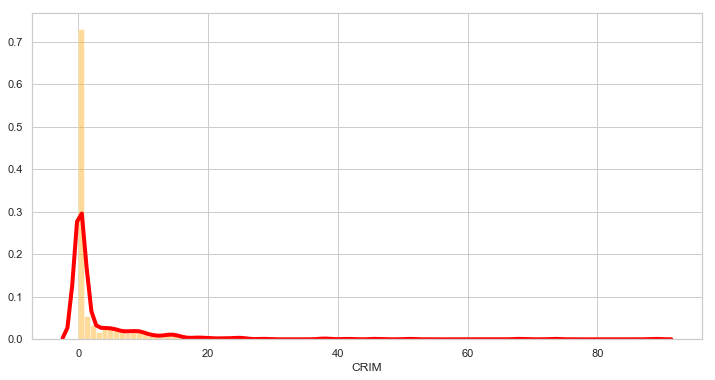

In [189]:
plt.figure(figsize = (12,6))
sns.distplot(przest, bins = 100, kde_kws = {"color": "red", "lw": 4}, hist_kws = {"color": "orange"})

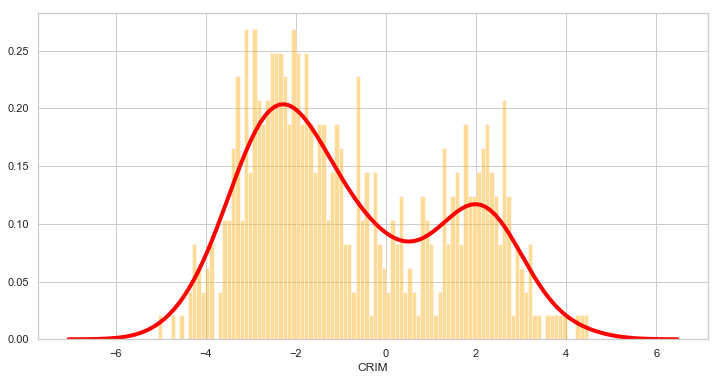

In [190]:
przest_log = np.log(przest)
plt.figure(figsize = (12,6))
sns.distplot(przest_log, bins = 100, kde_kws = {"color": "red", "lw": 4}, hist_kws = {"color": "orange"})

In [20]:
skew(przest_log)

0.40473014342603986

In [21]:
kurtosis(przest_log)

-1.0115821589964373

Zadanie nr 2 do sprawozdania: przeanalizuj wszystkie parametry - który jest zbliżony do rozkładu normalnego? Wybierz 3 parametry i wykorzystując ich opis ze strony (https://scikit-learn.org/stable/datasets/index.html#boston-dataset) postaraj się określić co oznacza rozkład tego parametru w obszarze badań.

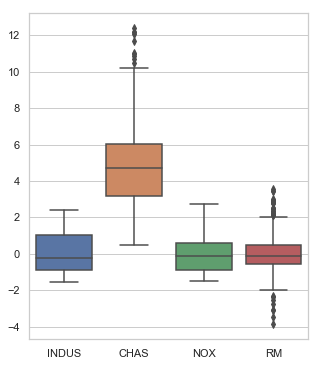

In [89]:

dane_norm = (dane-dane.mean())/dane.std()
dane_norm["CHAS"] = np.random.gamma(5,1,506)
dane_norm = dane_norm[["INDUS","CHAS","NOX","RM"]]
plt.figure(figsize = (5,6))
sns.boxplot(data = dane_norm)

Czy w danych znajdują się wartości odstające? Coś podejrzanego? Błędy pomiarowe mogą mieć wpływ na wyniki i należy je wyeliminować ze zbioru lub wyinterpolować.

Aby wykryć wartości odstające, przyjąć należy pewien próg powyżej którego (lub poniżej) wartości będą uznawane za będące błędami grubymi i pomiarowymi. W przypadku rozkładów normalnych, próg może być wyznaczony za pomocą odchylenia standardowego i średniej.

In [152]:
from IPython.display import Image
Image(url="https://miro.medium.com/max/679/0*y7kVHEQPQKBg3Cga.")

Lub w przypadku rozkładów o nieco innych parametrach - za pomocą mediany i odstępu międzykwartylowego

In [192]:
cena_mediana = cena.median()
cena_odstep = abs(cena.quantile(.25) - cena.quantile(.75))
cena_odstep

cena    7.975
dtype: float64

In [193]:
prog_grn = (cena_mediana + cena_odstep*3)[0]
prog_dln = (cena_mediana - cena_odstep*3)[0]
(prog_grn,prog_dln)


(45.125, -2.725000000000005)

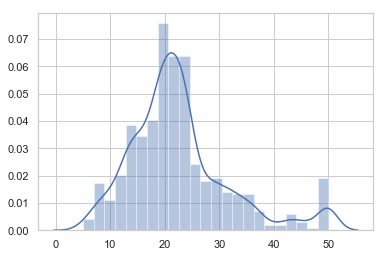

In [199]:
sns.distplot(cena)

Nie jest to oczwyście idealna metoda (raczej dość prosta), ale dzięki niej widać gdzie możemy mieć do czynienia z jakimś problemem/błędem w danych


In [194]:
cena[cena["cena"] > prog_grn]

,cena
161,50.0
162,50.0
163,50.0
166,50.0
186,50.0
195,50.0
203,48.5
204,50.0
225,50.0
228,46.7


Pomimo tego że nie będziemy usuwać tych danych ze zbioru, widzimy tu podejrzanie dużą liczbę wartości 50.0. Prawdobnie jest to wynik "ucięcia" danych, a zatem możemy się ich ze zbioru pozbyc, jako mało wiarygodne

In [198]:
dane_cena = dane
dane["cena"] = cena
dane_cena = dane_cena[dane_cena["cena"] < 50]
dane_cena.to_csv("Boston_clean.csv")

Zadanie: sprawdź czy w zbiorze znajduje się jeszcze jakaś rażąca wartość odstająca

Spójrzmy teraz na powiązania pomiędzy atrybutami oraz ceną. Skorzystajmy z wizualizacji w postaci wykresu punktowego

Text(0, 0.5, 'Cena')

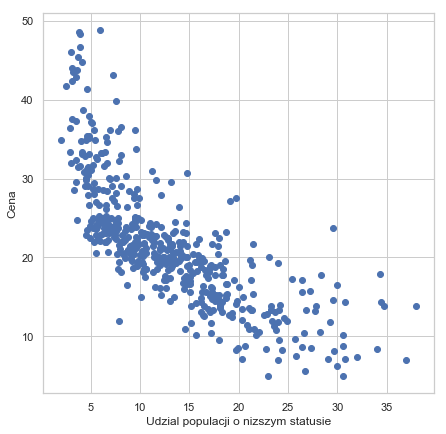

In [221]:
plt.figure(figsize = (7,7))
plt.scatter(x=dane_cena["LSTAT"],y=dane_cena["cena"])
plt.xlabel("Udzial populacji o nizszym statusie")
plt.ylabel("Cena")

Z wykorzystaniem seaborn:

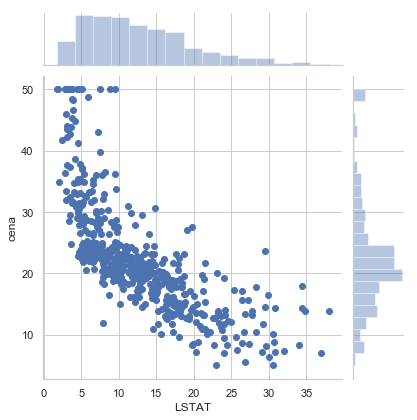

In [44]:
sns.jointplot(x=dane_cena["LSTAT"],y=dane_cena["cena"])

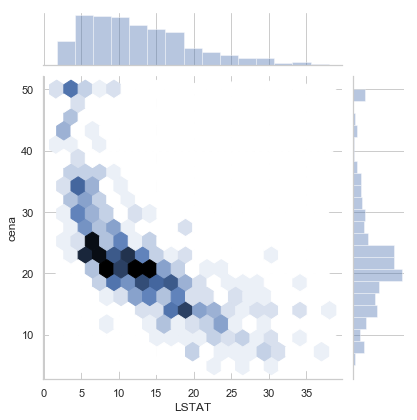

In [45]:
sns.jointplot(x=dane_cena["LSTAT"],y=dane_cena["cena"], kind="hex")

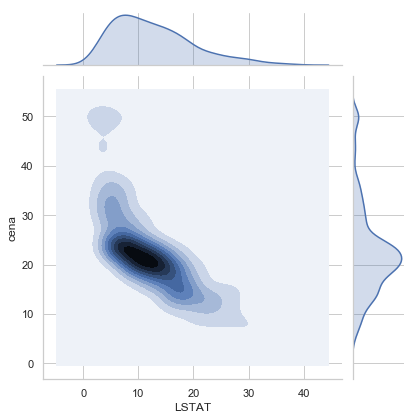

In [46]:
sns.jointplot(x=dane_cena["LSTAT"],y=dane_cena["cena"], kind="kde")

Widzimy pewną zależność, jak jednak ją opisać numerycznie? 
Wykorzystując współczynnik korelacji określić możemy jak bardzo dwie zmienne są od siebie zależne.

In [99]:
from scipy.stats import pearsonr, spearmanr

In [100]:
pearsonr(dane_cena["LSTAT"],dane_cena["cena"]) #Korelacja Pearsona

NameError: name 'dane_cena' is not defined

In [101]:
spearmanr(dane_cena["LSTAT"],dane_cena["cena"]) #Korelacja Spearmana

NameError: name 'dane_cena' is not defined

Te dwa współczynniki zachowują się nieco inaczej. Spójrzmy na przykłady:

(1.0, 0.0)
SpearmanrResult(correlation=1.0, pvalue=0.0)


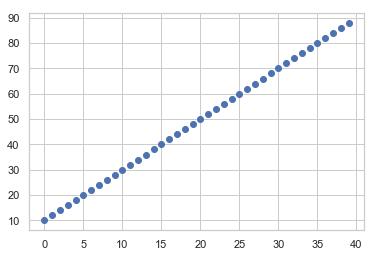

In [102]:
#Funkcja liniowa
x = np.arange(40)
y = 2*x+10
print(pearsonr(x,y))
print(spearmanr(x,y))
plt.scatter(x=x,y=y)

(0.9667572801316147, 4.136342972144068e-24)
SpearmanrResult(correlation=1.0, pvalue=0.0)


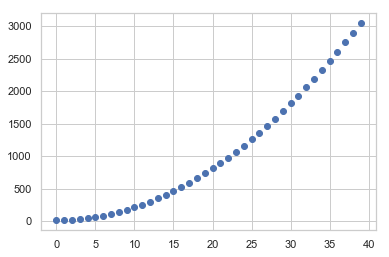

In [103]:
#Funkcja kwadratowa
x = np.arange(40)
y = (2*x**2)+10
print(pearsonr(x,y))
print(spearmanr(x,y))
plt.scatter(x=x,y=y)

(0.911650602856028, 2.9635516338862793e-16)
SpearmanrResult(correlation=0.9444652908067542, pvalue=5.842914397305295e-20)


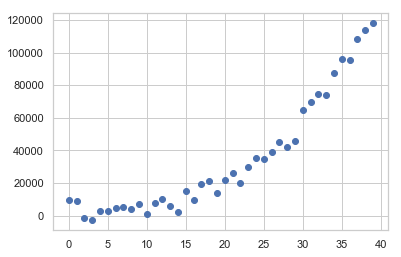

In [125]:
#Funkcja liniowa + szum
x = np.arange(40)
delta = np.random.uniform(-4000,10000, size=(40,))
y = 2*x**3 + x**2 + 10 + delta
print(pearsonr(x,y))
print(spearmanr(x,y))
plt.scatter(x=x,y=y)

(0.08288711162478757, 0.6111185716168621)
SpearmanrResult(correlation=0.10581613508442779, pvalue=0.5157912160910878)


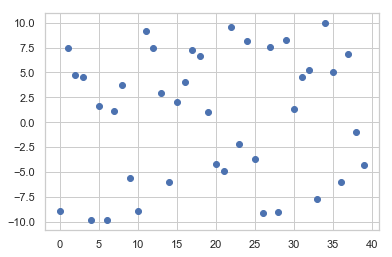

In [94]:
#Brak związku
x = np.arange(40)
delta = np.random.uniform(-10,10, size=(40,))
y = delta
print(pearsonr(x,y))
print(spearmanr(x,y))
plt.scatter(x=x,y=y)

(-0.8997269386586069, 2.952527355331684e-15)
SpearmanrResult(correlation=-0.9106941838649157, pvalue=3.6054465694426385e-16)


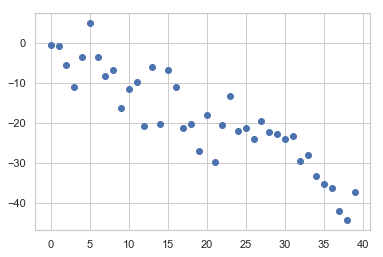

In [96]:
#Związek negatywny
x = np.arange(40)
delta = np.random.uniform(-10,10, size=(40,))
y = -x+delta
print(pearsonr(x,y))
print(spearmanr(x,y))
plt.scatter(x=x,y=y)

(0.07189712457620484, 0.6593074053582925)
SpearmanrResult(correlation=0.08667917448405253, pvalue=0.5948462958291355)


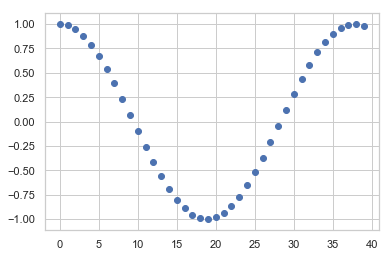

In [138]:
#Inna funkcja
x = np.arange(40)
delta = np.random.uniform(-1,1, size=(40,))
y = np.cos(x*2/12)
print(pearsonr(x,y))
print(spearmanr(x,y))
plt.scatter(x=x,y=y)

A zatem:

    Pearson - korelacje liniowe
    
    Spearman - korelacje monotoniczne

Jak sprawdzić wszystkie korelacje w naszych danych? Z pomocą przychodzi Pandas i jego funkcja corr()

In [225]:
dane_cena.corr("spearman") #lub pearson

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,cena
CRIM,1.000000,-0.567749,0.734039,0.022898,0.814588,-0.320320,0.696076,-0.737849,0.719559,0.719276,0.471956,-0.348466,0.674528,-0.607232
ZN,-0.567749,1.000000,-0.637216,-0.038718,-0.638504,0.363895,-0.539171,0.620315,-0.267629,-0.353051,-0.444383,0.155310,-0.508001,0.460571
INDUS,0.734039,-0.637216,1.000000,0.067557,0.795282,-0.429672,0.672525,-0.762489,0.451645,0.654654,0.443483,-0.276382,0.683290,-0.627882
CHAS,0.022898,-0.038718,0.067557,1.000000,0.056387,0.020024,0.046911,-0.046041,0.010141,-0.077259,-0.141410,-0.031759,0.007826,0.085541
NOX,0.814588,-0.638504,0.795282,0.056387,1.000000,-0.323612,0.793149,-0.880812,0.576825,0.641668,0.400035,-0.285583,0.674346,-0.609145
RM,-0.320320,0.363895,-0.429672,0.020024,-0.323612,1.000000,-0.292444,0.287453,-0.099909,-0.264346,-0.277844,0.059758,-0.626591,0.623046
AGE,0.696076,-0.539171,0.672525,0.046911,0.793149,-0.292444,1.000000,-0.797932,0.405327,0.512860,0.362126,-0.214990,0.708984,-0.606093
DIS,-0.737849,0.620315,-0.762489,-0.046041,-0.880812,0.287453,-0.797932,1.000000,-0.485012,-0.567960,-0.333705,0.232033,-0.626423,0.517748
RAD,0.719559,-0.267629,0.451645,0.010141,0.576825,-0.099909,0.405327,-0.485012,1.000000,0.698667,0.310210,-0.272477,0.417551,-0.378502
TAX,0.719276,-0.353051,0.654654,-0.077259,0.641668,-0.264346,0.512860,-0.567960,0.698667,1.000000,0.445525,-0.323067,0.560983,-0.600391


Trudno to odczytać prawda? Wspomóżmy się wizualizacją z seaborna, tak zwaną mapą ciepła:
https://seaborn.pydata.org/generated/seaborn.heatmap.html

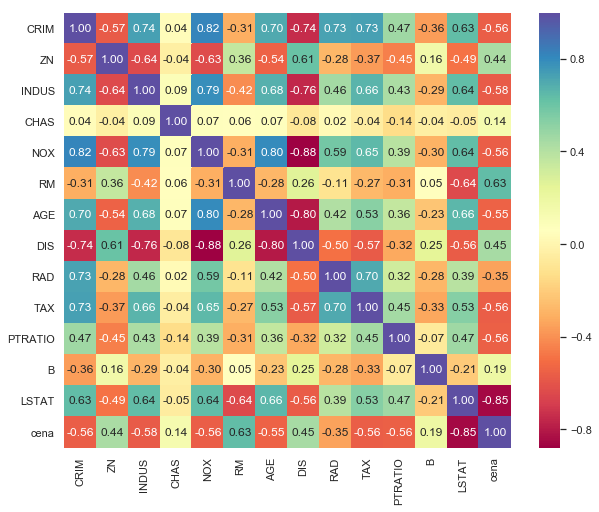

In [132]:
plt.figure(figsize = (10,8))
sns.heatmap(dane_cena.corr('spearman'), annot=True, fmt=".2f", cmap="Spectral")

Zadania ćwiczeniowe:
1. Wybierz 4 najbardziej skorelowane z ceną atrybuty i stwórz osobną tabelę (razem z ceną). UWAGA: atrybuty nie mogą być skorelowane ze sobą wzajemnie.
2. Wykonaj wykresy (scatterplot lub jointplot, oraz wykres regplot (zapoznaj się z nim w dokumentacji)). 
3. Policz dla skolerowanych atrybutów parametry statystyczne (mediana, kwartyle, skośność, kurtoza) oraz korelacje z ceną (pearsona i spearmana), określ rodzaj związku (negatywny, dodatni, liniowy, nieliniowy).

Zadanie nr 3 do sprawozdania:

Wykorzystaj inny zbiór danych load_diabetes (https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) i dokonaj identycznej analizy - statystyki, rozkłady, korelacje

Sprawozdanie ma zawierać:
1. Podstawowe statystyk każdego atrybutu oraz populacji docelowej (miara centralna, miara odchylenia, skośność, kurtoza)
2. Analizę wartości odstających - czy w zbiorze są jakieś błędy i wartości odstające?
3. Analizę korelacji atrybutów ze zmienną celową (postęp choroby). Wybierz 4 najbardziej skorelowane atrybuty i wykonaj wykres pokazujący ich relację z ceną. Określ ich związek z ceną. 
4. Wnioski - czy łatwo jest przewidzieć postęp choroby wykorzystujące te parametry? Czy są obecne błędy pomiarowe? Które zjawisko jest najbardziej skorelowane i w jaki sposób?


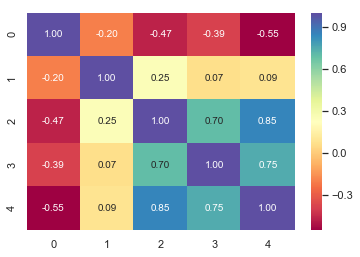

In [185]:
x = np.arange(40)
delta = np.random.uniform(-20,21, size=(40,))
c = 2*x**3 - x**2 + 10 + np.random.uniform(-3000,100000, size=(40,))
a = -x+delta
b = np.cos(x*2/12)
d = 2*x+10 + np.random.uniform(2,100, size=(40))
sns.heatmap(pd.DataFrame([a,b,c,d,x]).T.corr('spearman'), annot=True, fmt=".2f", cmap="Spectral")

In [147]:
pearsonr(a,c)

(0.10337743551344544, 0.5255666148645184)